In [1]:
import sklearn.metrics
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

from IPython.display import display, Image

%matplotlib inline

# Стандартные метрики классификации

In [2]:
iris_data = load_iris()

In [3]:
pred = LogisticRegression().fit(iris_data.data, iris_data.target).predict(iris_data.data)
pred_proba = LogisticRegression().fit(iris_data.data, iris_data.target).predict_proba(iris_data.data)

/home/tylorn/envs/python_data_science/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tylorn/envs/python_data_science/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/tylorn/envs/python_data_science/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tylorn/envs/python_data_science/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Accuracy

- Accuracy - доля объектов, в которых предсказанный класс совпал с реальным

- Можно интерпретировать как вероятность правильно предсказать класс на случайно выбранном объекте

- Не репрезентативна при несбалансированных классах

In [4]:
sklearn.metrics.accuracy_score(iris_data.target, pred)

0.96

* Посмотрим на замечательную картинку с википедии, чтобы осознать.
* Как посчитать Accuracy в терминах TP, FP, TN, FN?

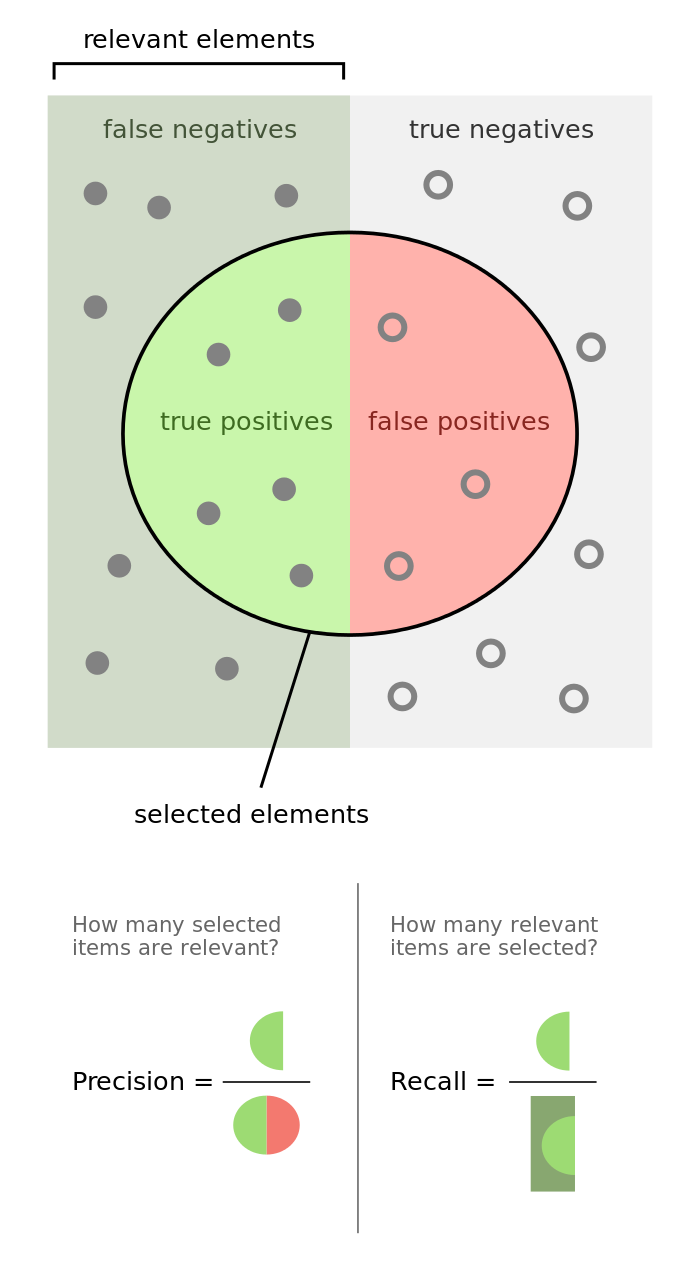

In [5]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png'
Image(url, width=400)

### Precision

- Precision - количество правильно предсказанных объектов класса делённое на количество  объектов, которым этот класс был предсказан

- Можно интепретировать как вероятность того, что объект, отнесённый моделью к классу, окажется объектом этого класса.

- С точки зрения вероятности precision это $P(y = c \mid a(x) = c)$

In [6]:
sklearn.metrics.precision_score(iris_data.target, pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [7]:
sklearn.metrics.precision_score(iris_data.target, pred, average=None)

array([1.        , 0.97826087, 0.90740741])

### Recall

- Recall - количество правильно предсказанных объектов класса делённое на количество  объектов этого класса

- Можно интепретировать как вероятность того, что объект  класса будет отнесён моделью к этому классу

- С точки зрения вероятности recall это $P(a(x) = с \mid y = с)$

In [8]:
sklearn.metrics.recall_score(iris_data.target, pred, average=None)

array([1.  , 0.9 , 0.98])

### F1 мера

- $f_1$ мера - способ скомбинировать recall и precision в одну метрику

- $f_1 = \frac{2~precsion~recall}{precision~+~recall}$

- Является средним гармоническим - $\frac{2}{f_1} = \frac{1}{precision} + \frac{1}{recall}$

- Имеет обобщение для учёта важности precision и recall $\frac{1 + \beta^2}{f_{\beta}} = \frac{1}{precision} + \frac{\beta^2}{recall} \implies f_{\beta} = \frac{(1+\beta^2)~precsion~recall}{\beta^2 precision~+~recall}$ 


In [9]:
sklearn.metrics.f1_score(iris_data.target, pred, average=None)

array([1.        , 0.9375    , 0.94230769])

In [10]:
sklearn.metrics.fbeta_score(iris_data.target, pred, beta=1, average=None)

array([1.        , 0.9375    , 0.94230769])

In [11]:
sklearn.metrics.fbeta_score(iris_data.target, pred, beta=2, average=None)

array([1.        , 0.91463415, 0.96456693])

Быстрый способ посмотреть сразу на все эти метрики - функция classification_report

(Прим.) support - количество объектов данного класса

In [12]:
print(sklearn.metrics.classification_report(iris_data.target, pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        50
           1     0.9783    0.9000    0.9375        50
           2     0.9074    0.9800    0.9423        50

   micro avg     0.9600    0.9600    0.9600       150
   macro avg     0.9619    0.9600    0.9599       150
weighted avg     0.9619    0.9600    0.9599       150



Довольно часто алгоритм выдаёт не просто метку класса, а вероятность / меру уверенности в классификации объекта, выставляя различные пороги для классов, мы получим не одну точку (precision, recall), а целый набор точек.

Тогда информативен совместный график precision-recall-threshold

Получить его можно при помощи функции precision_recall_curve

In [13]:
probas = LogisticRegression().fit(iris_data.data, iris_data.target).predict_proba(iris_data.data)

/home/tylorn/envs/python_data_science/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tylorn/envs/python_data_science/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
probas[:10, :]

array([[8.78030305e-01, 1.21958900e-01, 1.07949250e-05],
       [7.97058292e-01, 2.02911413e-01, 3.02949242e-05],
       [8.51997665e-01, 1.47976480e-01, 2.58550858e-05],
       [8.23406019e-01, 1.76536159e-01, 5.78217704e-05],
       [8.96034973e-01, 1.03953836e-01, 1.11907339e-05],
       [9.26234254e-01, 7.37527845e-02, 1.29612594e-05],
       [8.94096848e-01, 1.05863935e-01, 3.92166195e-05],
       [8.60034410e-01, 1.39946715e-01, 1.88751124e-05],
       [8.01028643e-01, 1.98886755e-01, 8.46025595e-05],
       [7.92662392e-01, 2.07312003e-01, 2.56051563e-05]])

In [15]:
sklearn.metrics.precision_recall_curve(iris_data.target, probas)

ValueError: multiclass format is not supported

Используем dataset с бинарным target-ом

In [16]:
cancer_data = load_breast_cancer()

In [17]:
probas = LogisticRegression().fit(cancer_data.data, cancer_data.target).predict_proba(cancer_data.data)

/home/tylorn/envs/python_data_science/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
probas[:10]

array([[1.00000000e+00, 2.73602806e-15],
       [9.99999980e-01, 1.97887383e-08],
       [9.99999959e-01, 4.09832472e-08],
       [4.84361693e-01, 5.15638307e-01],
       [9.99991794e-01, 8.20621213e-06],
       [7.96714997e-01, 2.03285003e-01],
       [9.99999112e-01, 8.87573394e-07],
       [9.81907687e-01, 1.80923126e-02],
       [9.07850891e-01, 9.21491091e-02],
       [9.96899955e-01, 3.10004537e-03]])

In [19]:
sklearn.metrics.precision_recall_curve(cancer_data.target, probas)

ValueError: bad input shape (569, 2)

In [20]:
precision, recall, threshold = sklearn.metrics.precision_recall_curve(cancer_data.target, probas[:, 1])

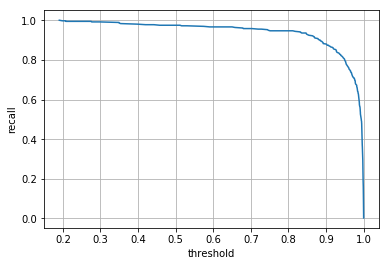

In [21]:
plt.xlabel('threshold')
plt.ylabel('recall')
plt.plot(threshold, recall[:-1])
plt.grid()
plt.show()

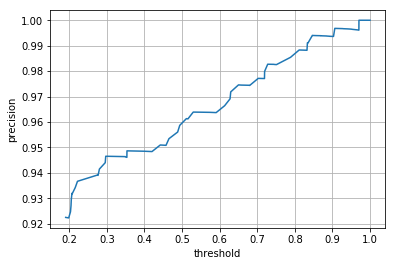

In [22]:
plt.xlabel('threshold')
plt.ylabel('precision')
plt.plot(threshold, precision[:-1])
plt.grid()
plt.show()

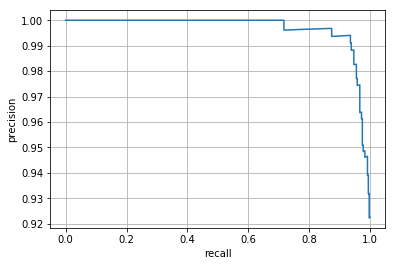

In [23]:
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall, precision)
plt.grid()
plt.show()

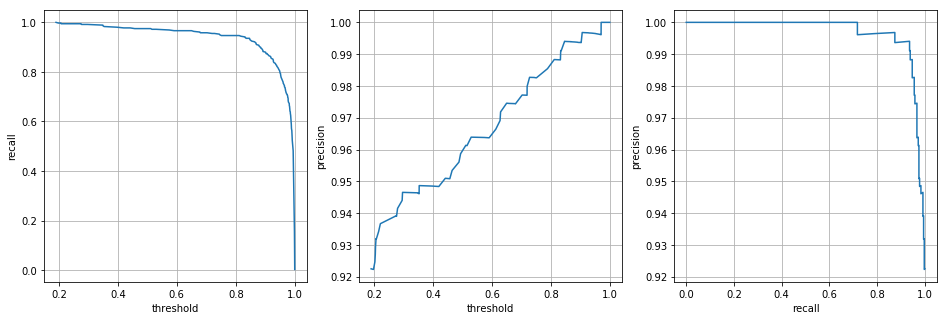

In [24]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.xlabel('threshold')
plt.ylabel('recall')
plt.plot(threshold, recall[:-1])
plt.grid()

plt.subplot(1, 3, 2)
plt.xlabel('threshold')
plt.ylabel('precision')
plt.plot(threshold, precision[:-1])
plt.grid()

plt.subplot(1, 3, 3)
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall, precision)
plt.grid()

plt.show()

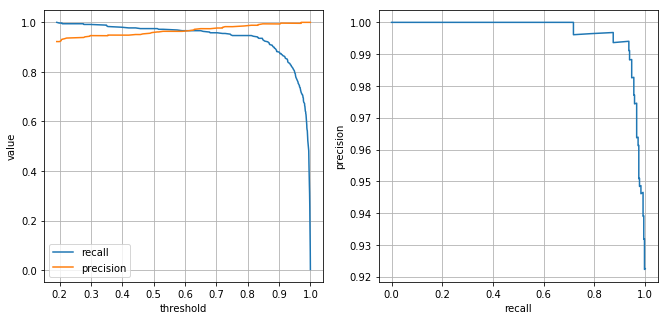

In [25]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.xlabel('threshold')
plt.ylabel('value')
plt.plot(threshold, recall[:-1])
plt.plot(threshold, precision[:-1])
plt.legend(['recall', 'precision'])
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('recall')
plt.ylabel('precision')
plt.plot(recall, precision)
plt.grid()

plt.show()

- Ещё один общепринятый способ скомбинировать precision и recall - подсчитать площадь под precision-recall прямой

- AUC - Area Under Curve, поэтому данную метрику также называют PR AUC

- В sklearn этот метод называется average_precision_score

In [26]:
sklearn.metrics.average_precision_score(cancer_data.target, probas[:, 1])

0.9967573817195043

### ROC-AUC

Помимо precision-recall кривой так же часто используют roc кривую

Чтобы определить roc кривую нужно ввести обозначения:

- TP - True Positive - #$\{a(x) = 1, y = 1\}$

- FP - False Positive - #$\{a(x) = 1, y = 0\}$

- TN - True Negative - #$\{a(x) = 0, y = 0\}$

- FN - False Negative - #$\{a(x) = 0, y = 1\}$

Тогда:

- TPR - True Positive Rate - $\frac{TP}{TP + FN}$

- FPR - False Positive Rate - $\frac{FP}{FP + TN}$

ROC кривая это набор точек $(FPR, TPR)$, полученный варирование порога


**Что такое precision, recall и accuracy в данных обозначениях?**

In [27]:
sklearn.metrics.confusion_matrix(cancer_data.target, probas[:, 1] > 0.5)

array([[198,  14],
       [  9, 348]])

In [28]:
sklearn.metrics.confusion_matrix(iris_data.target, pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [29]:
(
    (tp, fp),
    (fn, tn)
) = sklearn.metrics.confusion_matrix(cancer_data.target, probas[:, 1] > 0.5)

In [30]:
tp / (tp + fn), fp / (fp + tn)

(0.9565217391304348, 0.03867403314917127)

In [31]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(cancer_data.target, probas[:, 1])

In [32]:
tpr[fpr <= 0.03867403315].max()

0.957983193277311

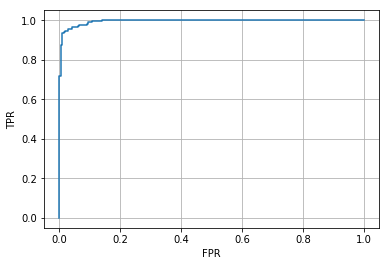

In [33]:
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr)
plt.grid()
plt.show()

- ROC AUC - площадь под данной кривой

- В sklearn считается функцией roc_auc_score

In [34]:
sklearn.metrics.roc_auc_score(cancer_data.target, probas[:, 1])

0.9946752285819989

- **Чему равен ROC AUC случайного предсказания? (то есть proba - равномерно распределённая на отрезке случайная величина)**
- **Чему равен ROC AUC константного предсказания?**

In [35]:
sklearn.metrics.roc_auc_score(cancer_data.target, np.zeros_like(cancer_data.target))

0.5

In [36]:
sklearn.metrics.roc_auc_score(cancer_data.target, np.random.uniform(size=len(cancer_data.target)))

0.5125654035198985

### Logloss (cross entropy)

- Минус логарифм правдоподобия выборки $log loss = -\frac1n \sum\limits_{i=1}^n (y_i \log a(x_i) + (1 - y_i) \log (1 - a(x_i)))$

/home/tylorn/envs/python_data_science/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


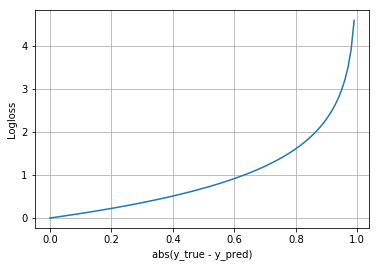

In [37]:
x = np.linspace(0, 1, 100)
loss = [-np.log(1-i) for i in x]

plt.ylabel('Logloss')
plt.xlabel('abs(y_true - y_pred)')
plt.plot(x, loss)
plt.grid()

In [38]:
sklearn.metrics.log_loss(cancer_data.target, probas[:, 1])

0.09193401461627686

- Многоклассовый случай

$log loss = -\frac1n
\sum\limits_{i=1}^n y_i \log p(y_i | x_i)$

y_i - класс объекта i

In [39]:
sklearn.metrics.log_loss(iris_data.target, pred_proba)

0.3086090914690601